In [101]:
# Class : DSC540-T301 Data Preparation (2237-1)
# Name : Rajib Samanta
# Assignment : Week 7 & 8 Excercises
## Assignment 1:  Data Wrangling with Python: Activity 9 & 10

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [102]:
# Data Wrangling with Python: Activity 9, page 294
# Extracting the Top 100 eBooks from Gutenberg
# 1. Import the necessary libraries, including regex and beautifulsoup:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re


In [103]:
# 2. Check the SSL certificate
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [104]:
# 3 Read the HTML from the URL:# Read the HTML from the URL and pass on to BeautifulSoup
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)
response

<Response [200]>

In [105]:
# 4 Write a small function to check the status of the web request:
def status_check(r):    
    if r.status_code==200:        
        print("Success!")        
        return 1    
    else:        
        print("Failed!")        
        return -1
# Check the status of response:
print('The output of URL call Status : ' )
status_check(response)

The output of URL call Status : 
Success!


1

In [106]:
# 5 Decode the response and pass it on to BeautifulSoup for HTML parsing:
contents = response.content.decode(response.encoding) # get the content from the reposne
soup = BeautifulSoup(contents, 'html.parser') # parse the content with html parser as this is html web based page
# Check the data after HTML parsing
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Top 100 | Project Gutenberg</title>
<link href="/gutenberg/style.css?v=1.1" rel="stylesheet"/>
<link href="/gutenberg/collapsible.css?1.1" rel="stylesheet"/>
<link href="/gutenberg/new_nav.css?v=1.321231" rel="stylesheet"/>
<link href="/gutenberg/pg-desktop-one.css" rel="stylesheet"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="books, ebooks, free, kindle, android, iphone, ipad" name="keywords">
<meta content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io" name="google-site-verification"/>
<meta content="4WNaCljsE-A82vP_ih2H_UqXZvM" name="alexaVerifyID"/>
<link href="https://www.gnu.org/copyleft/fdl.html" rel="copyright">
<link href="/gutenberg/favicon.ico?v=1.1" rel="shortcut icon">
<meta content="Project Gutenberg" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.gutenberg.org/" property="og:url"/>
<m

In [107]:
#6 Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements:
# Define Empty list to hold all the http links in the HTML page
lst_links=[]
# Find all the href tags and store them in the list of links
#  a href is the tag name for link
for link in soup.find_all('a'):
    lst_links.append(link.get('href')) #print(link.get('href'))    
# Print the 30 links :
lst_links[:30]


['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [108]:
# 7 & 8 Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 books. Initialize the empty list to hold the file numbers:
booknum=[] # define blank list variable to store book info
# Numbers 19 to 118 in the original list of links have the top 100 eBooks' numbers. Loop over the appropriate range and use a regex to find the numeric digits in the link (href) string. Use the findall() method:
for i in range(19,119):    
    link=lst_links[i]    
    link=link.strip()    # Regular expression to find the numeric digits in the link (href) string    
    n=re.findall('[0-9]+',link)    
    if len(n)==1:        # Append the filenumber casted as integer        
        booknum.append(int(n[0]))
# Print the file numbers:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1513, 2701, 2641, 145, 37106, 100, 67979, 16389, 394, 6761, 2160, 4085, 1399, 1259, 6593, 5197, 1342, 11, 71285, 1184, 84, 71283, 71286, 98, 345, 1661, 71284, 174, 17346, 28054, 55387, 74, 71282, 2591, 67149, 5200, 2600, 64317, 27827, 2554, 4300, 1232, 76, 30254, 58585, 1998, 1080, 3206, 2680, 1260, 4363, 821, 244, 1400, 844, 1952, 6130, 43, 1727, 5740, 33283, 46, 2542, 996, 45, 768, 205, 1497, 5827, 45109, 42108, 158, 600, 55, 71280, 120, 8800, 730, 514, 71, 135, 36, 67098, 24869, 10, 8492]


In [109]:
# 9 What does the soup object's text look like? Use the .text method and print only the first 2,000 characters
#. (do not print the whole thing as it is too long).

#soup.text[:2000])
## it gives extra spaces
# Remove extra spaces and print the first 2000 characters
cleaned_text = re.sub(r'\s+', ' ', soup.text[:2000].strip())
print(cleaned_text)


Top 100 | Project Gutenberg Menu▾ About ▾ ▾ About Project Gutenberg Collection Development Contact Us History & Philosophy Permissions & License Privacy Policy Terms of Use Search and Browse ▾ ▾ Book Search Bookshelves Frequently Downloaded Offline Catalogs Help ▾ ▾ All help topics → Copyright How-To Errata, Fixes and Bug Reports File Formats Frequently Asked Questions Policies → Public Domain eBook Submission Submitting Your Own Work Tablets, Phones and eReaders The Attic → Donate Donation Frequently Viewed or Downloaded These listings are based on the number of times each eBook gets downloaded. Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted. Downloaded Books 2023-07-28224074 last 7 days1501104 last 30 days5913305 Top 100 EBooks yesterday Top 100 Authors yesterday Top 100 EBooks last 7 days Top 100 Authors last 7 days Top 100 EBooks last 30 days

In [110]:
# 10,11,12,13  Search the extracted text (using regular expression) from the soup object to find the names of top 100 eBooks (yesterday's rank) 
#.       and print them:
lst_titles_temp=[] # Temp empty list of Ebook 
# Index search only for the string 'Top 100 EBooks yesterday'
target_text= 'Top 100 EBooks yesterday'
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')
if start_idx != -1:
    print(f"Found '{target_text}' at index {start_idx}.")
else:
    print(f"'{target_text}' not found in the HTML content.")
    
for i in range(100):    
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

lst_titles=[]
for i in range(100):  # looking for first 100 lines 
    id1,id2=re.match('^[a-zA-Z ;,\'.:]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])
# Remove blank lines using filter()
filtered_list = list(filter(lambda x: x.strip(), lst_titles))
#pr#--> Still list has Top line which are not book title, lets remove
# Print the list of titles:


# Remove lines starting with 'TOP ' using list comprehension
filtered_list = [item for item in filtered_list if not item.startswith('Top ')]
#print(filtered_list)
print('Print the list of titles : ')
print('------------------------------- ')
for title in filtered_list:    
    print(title)


Found 'Top 100 EBooks yesterday' at index 113.
Print the list of titles : 
------------------------------- 
Romeo and Juliet by William Shakespeare 
Moby Dick; Or, The Whale by Herman Melville 
A Room with a View by E. M.  Forster 
Middlemarch by George Eliot 
Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott 
The Complete Works of William Shakespeare by William Shakespeare 
The Blue Castle: a novel by L. M.  Montgomery 
The Enchanted April by Elizabeth Von Arnim 
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Ferdinand Count Fathom 
The Expedition of Humphry Clinker by T.  Smollett 
The Adventures of Roderick Random by T.  Smollett 
Anna Karenina by graf Leo Tolstoy 
Twenty Years After by Alexandre Dumas 
History of Tom Jones, a Foundling by Henry Fielding 
My Life 
Pride and Prejudice by Jane Austen 
Alice's Adventures in Wonderland by Lewis Carroll 
Dead letters by Maurice Baring 
The Count of Monte Cristo, Illustrated by Alexandre Dumas 
Frankenstein; Or, The

In [111]:
# Activity 10: Extracting the top 100 eBooks from Gutenberg.org
# Register email address to generate API Key
# Open the omdb api key website (omdbapi.com/apikey.aspx)
#--> OMDb API: http://www.omdbapi.com/?i=tt3896198&apikey=a306ad67
{
   "OMDBapi" : "a306ad67" 
}

{'OMDBapi': 'a306ad67'}

In [112]:
# Import urllib.request, urllib.parse, urllib.error, and json:
import urllib.request, urllib.parse, urllib.error
import json


In [130]:
# Open the APIkeys.json
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

#apikey = '&apikey='+omdbapi # store in local variable
apikey = omdbapi # store in local variable
print(apikey)

# The final URL to be passed with the APIkey
serviceurl = 'http://www.omdbapi.com/?' ## OMDB base url

# final url for title : Guardians of the Galaxy Vol. 2
title='Guardians of the Galaxy Vol. 2'
#http://www.omdbapi.com/?t='Guardians of the Galaxy Vol. 2'&apikey=secretapikey



a306ad67


In [132]:
def fetch_movie_details(api_key, title):
    url = f"http://www.omdbapi.com/?t={title}&apikey={api_key}"
    print(url)
    #url='http://www.omdbapi.com/?i=tt3896198&apikey=a306ad67'

    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch movie details. Status Code: {response.status_code}")
        return None

if __name__ == "__main__":
    api_key = "a306ad67"  # Replace with  OMDB API key
    title='Guardians of the Galaxy Vol. 2'  # Replace with the title we want to fetch details for
    print(title)

    movie_details = fetch_movie_details(api_key, title)
    if movie_details:
        print("Movie Details of -- Guardians of the Galaxy Vol. 2")
        print('--------------------------------------------------')
        for key, value in movie_details.items():
            print(f"{key}: {value}")

Guardians of the Galaxy Vol. 2
http://www.omdbapi.com/?t=Guardians of the Galaxy Vol. 2&apikey=a306ad67
Movie Details of -- Guardians of the Galaxy Vol. 2
--------------------------------------------------
Title: Guardians of the Galaxy Vol. 2
Year: 2017
Rated: PG-13
Released: 05 May 2017
Runtime: 136 min
Genre: Action, Adventure, Comedy
Director: James Gunn
Writer: James Gunn, Dan Abnett, Andy Lanning
Actors: Chris Pratt, Zoe Saldana, Dave Bautista
Plot: The Guardians struggle to keep together as a team while dealing with their personal family issues, notably Star-Lord's encounter with his father, the ambitious celestial being Ego.
Language: English
Country: United States
Awards: Nominated for 1 Oscar. 15 wins & 60 nominations total
Poster: https://m.media-amazon.com/images/M/MV5BNjM0NTc0NzItM2FlYS00YzEwLWE0YmUtNTA2ZWIzODc2OTgxXkEyXkFqcGdeQXVyNTgwNzIyNzg@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.6/10'}, {'Source': 'Rotten Tomatoes', 'Value': '85%'}, {'

In [133]:
# Untility function to download poster from movie information
def download_movie_poster(movie_details, save_path):
    if 'Poster' in movie_details and movie_details['Poster'] != 'N/A':
        poster_url = movie_details['Poster']

        response = requests.get(poster_url)
        if response.status_code == 200:
            with open(save_path, 'wb') as f:
                f.write(response.content)
            print(f"Poster downloaded and saved to: {save_path}")
        else:
            print(f"Failed to download poster. Status Code: {response.status_code}")
    else:
        print("No poster available for this movie.")

#--> Call the download function

poster_path = "movie_poster.jpg"  #  path and filename
download_movie_poster(movie_details, poster_path)

Poster downloaded and saved to: movie_poster.jpg


In [134]:
## Call movie function by entering 'Titanic'
title="Titanic"
movie_details = fetch_movie_details(api_key, title)
if movie_details:
        print("Movie Details of -- Guardians of the Galaxy Vol. 2")
        print('--------------------------------------------------')
        for key, value in movie_details.items():
            print(f"{key}: {value}")

http://www.omdbapi.com/?t=Titanic&apikey=a306ad67
Movie Details of -- Guardians of the Galaxy Vol. 2
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Poster: https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,228,124
imdbID: tt0120338
Type: movie
DVD: 08 Jan 

In [135]:
## Call movie function by entering 'Random_error'
title="Random_error"
movie_details = fetch_movie_details(api_key, title)
if movie_details:
        print("Movie Details of -- Guardians of the Galaxy Vol. 2")
        print('--------------------------------------------------')
        for key, value in movie_details.items():
            print(f"{key}: {value}")

http://www.omdbapi.com/?t=Random_error&apikey=a306ad67
Movie Details of -- Guardians of the Galaxy Vol. 2
--------------------------------------------------
Response: False
Error: Movie not found!


In [136]:
# 3. Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.
## a. In previous versions of this course we have always used Twitter, but with recent organizational changes at Twitter, it has become increasingly difficult to access the free APIs available at Twitter. You are more than welcome to try to use Twitter's API for this portion of the assignment, but please note, there has been some inconsistency experienced when following along with their documentation posted.
## b. Connect to the API and do a "Get" call/operation on the API to return a subset of data from the API
def get_weather_data(api_key, city_name):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}"

    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch weather data. Status Code: {response.status_code}")
        return None

if __name__ == "__main__":
    api_key = "eef7222cf1fdaeae6fe076a9c5205bd3"  # Replace with  OpenWeatherMap API key
    city_name = "London"      # Replace with the city name for which you want to fetch weather data
    weather_data = get_weather_data(api_key, city_name)
    if weather_data:
        print(f"Weather data for {city_name}:")
        print("Temperature:", weather_data["main"]["temp"], "K")
        print("Weather:", weather_data["weather"][0]["main"])
        print("Description:", weather_data["weather"][0]["description"])
        print("Humidity:", weather_data["main"]["humidity"], "%")
        print("Wind Speed:", weather_data["wind"]["speed"], "m/s")
    else:
        print("Failed to fetch weather data.")



Weather data for London:
Temperature: 287.91 K
Weather: Clouds
Description: scattered clouds
Humidity: 82 %
Wind Speed: 0.89 m/s


In [138]:
# 4. Using one of the datasets provided, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.
## a. Line
## b. Scatter
## c. Bar
## d. Histogram
## e. Density Plot
## f. Pie Chart


# The data set about mall customer segmentation data file : Mall_Customers.csv
data = pd.read_csv('Mall_Customers.csv')
data.head(10)



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


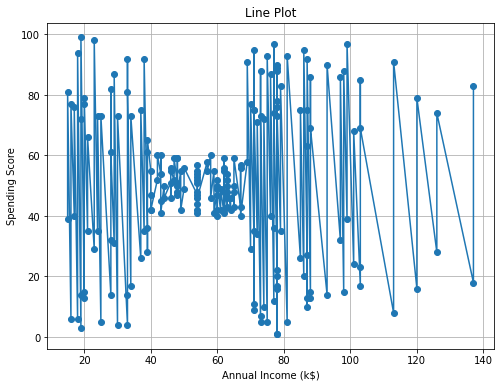

In [145]:
# Step 4: Choose three visualizations (Line, Scatter, and Bar)
## Ploting the Relation between Age , Annual Income and Spending Score
# Line Plot
plt.figure(figsize=(8, 6))
plt.plot(data['Annual Income (k$)'], data['Spending Score (1-100)'], marker='o')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

plt.title('Line Plot')
plt.grid(True)
plt.savefig('line_plot.png')
plt.show()

##--> Line plot show that Spending Score does not depend on the income 

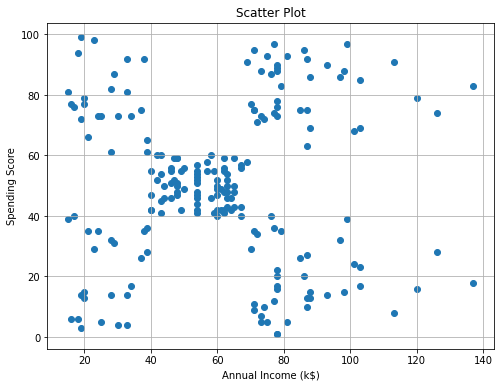

In [146]:
# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Scatter Plot')
plt.grid(True)
plt.savefig('scatter_plot.png')
plt.show()

##--> Scatter plot show that Spending Score does not depend on the income 

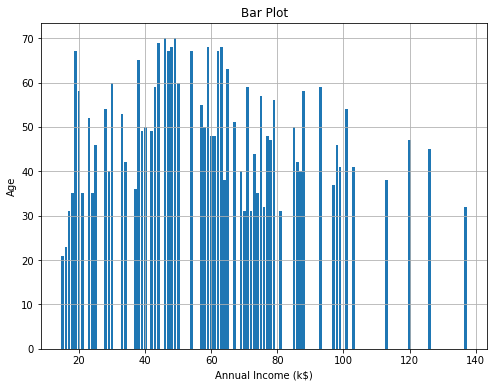

In [147]:
# Bar Plot
plt.figure(figsize=(8, 6))
plt.bar(data['Annual Income (k$)'], data['Age'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('Bar Plot')
plt.grid(True)
plt.savefig('bar_plot.png')
plt.show()
##--> Bar plot shows that between 30 to 45 age group do more income 

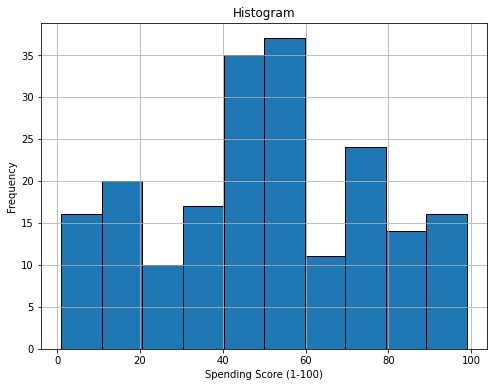

In [148]:
# Histogram for Spending Score
plt.figure(figsize=(8, 6))
plt.hist(data['Spending Score (1-100)'], bins=10, edgecolor='black')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.savefig('histogram.png')
plt.show()
##--> Histogram of pending Score shows that maximum people spending score between 40 to 60

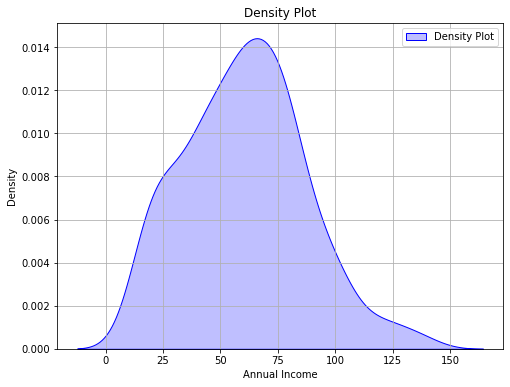

In [149]:
# Density Plot
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Annual Income (k$)'], fill=True, color='blue', label='Density Plot')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Density Plot')
plt.grid(True)
plt.legend()
plt.savefig('density_plot.png')
plt.show()
##--> Density Plot of Annual Income shows that maximum people annual income is between 50 to 75k

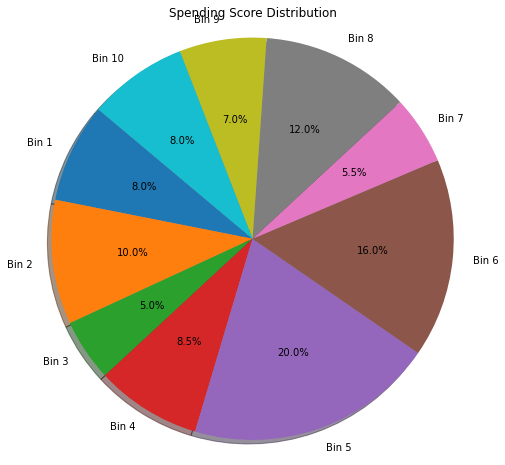

In [144]:
# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Create 10 bins with equal width for the Spending Score
# The 'cut' function will categorize the data into bins
num_bins = 10
df['Score Category'] = pd.cut(data['Spending Score (1-100)'], bins=num_bins, labels=[f'Bin {i+1}' for i in range(num_bins)])

# Count the number of occurrences in each bin
bin_counts = df['Score Category'].value_counts().sort_index()

# Create a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Spending Score Distribution')
plt.savefig('spending_score_pie_chart.png')
plt.show()
##--> Pie Chart of pending Score shows that maximum people spending score between 50 to 60 and is around 20% of the population.